<a href="https://colab.research.google.com/github/sddemir/yapay-zeka-metin-duygu-analiz/blob/master/x_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot
!pip install scipy==1.10.1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/Tweets.csv')

In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
print(df.columns)

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')


In [ ]:
df.drop(['selected_text', 'textID'], axis=1, inplace = True )
target = 'sentiment'
df.reset_index(drop = True, inplace = True)
orginal_df = df.copy(deep = True)
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
print('Dimentions of dataset:', df.shape)
df.info()

Dimentions of dataset: (27481, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27481 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB


In [ ]:
df.describe()

,text,sentiment
count,27480,27481
unique,27480,3
top,"I`d have responded, if I were going",neutral
freq,1,11118


In [ ]:
df.isnull().sum()

,0
text,1
sentiment,0


In [ ]:
df.dropna(inplace = True)
orginal_df = df.copy()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text', 'word_count']].head()

,text,word_count
0,"I`d have responded, if I were going",8
1,Sooo SAD I will miss you here in San Diego!!!,11
2,my boss is bullying me...,5
3,what interview! leave me alone,6
4,"Sons of ****, why couldn`t they put them on t...",15


In [ ]:
df['char_count'] = df['text'].str.len()
df[['text', 'char_count']].head()

,text,char_count
0,"I`d have responded, if I were going",36
1,Sooo SAD I will miss you here in San Diego!!!,46
2,my boss is bullying me...,25
3,what interview! leave me alone,31
4,"Sons of ****, why couldn`t they put them on t...",75


In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text', 'avg_word']].head()

,text,avg_word
0,"I`d have responded, if I were going",4.142857
1,Sooo SAD I will miss you here in San Diego!!!,3.600000
2,my boss is bullying me...,4.200000
3,what interview! leave me alone,5.200000
4,"Sons of ****, why couldn`t they put them on t...",4.357143


In [ ]:
df.head()

,text,sentiment,word_count,char_count,avg_word
0,"I`d have responded, if I were going",neutral,8,36,4.142857
1,Sooo SAD I will miss you here in San Diego!!!,negative,11,46,3.600000
2,my boss is bullying me...,negative,5,25,4.200000
3,what interview! leave me alone,negative,6,31,5.200000
4,"Sons of ****, why couldn`t they put them on t...",negative,15,75,4.357143


In [ ]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop]))
df[['text', 'stopwords', 'text_without_stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,stopwords,text_without_stopwords
0,"I`d have responded, if I were going",3,"I`d responded, I going"
1,Sooo SAD I will miss you here in San Diego!!!,4,Sooo SAD I miss San Diego!!!
2,my boss is bullying me...,2,boss bullying me...
3,what interview! leave me alone,2,interview! leave alone
4,"Sons of ****, why couldn`t they put them on t...",7,"Sons ****, couldn`t put releases already bought"


In [ ]:
df['at'] = df['text'].apply(lambda x: len([ x for x in x.split() if x.startswith('@')]))
df[['text', 'at']].head()

,text,at
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0


In [ ]:
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['text', 'numerics']].head()

,text,numerics
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0


In [ ]:
df.head()

,text,sentiment,word_count,char_count,avg_word,stopwords,text_without_stopwords,at,numerics
0,"I`d have responded, if I were going",neutral,8,36,4.142857,3,"I`d responded, I going",0,0
1,Sooo SAD I will miss you here in San Diego!!!,negative,11,46,3.600000,4,Sooo SAD I miss San Diego!!!,0,0
2,my boss is bullying me...,negative,5,25,4.200000,2,boss bullying me...,0,0
3,what interview! leave me alone,negative,6,31,5.200000,2,interview! leave alone,0,0
4,"Sons of ****, why couldn`t they put them on t...",negative,15,75,4.357143,7,"Sons ****, couldn`t put releases already bought",0,0


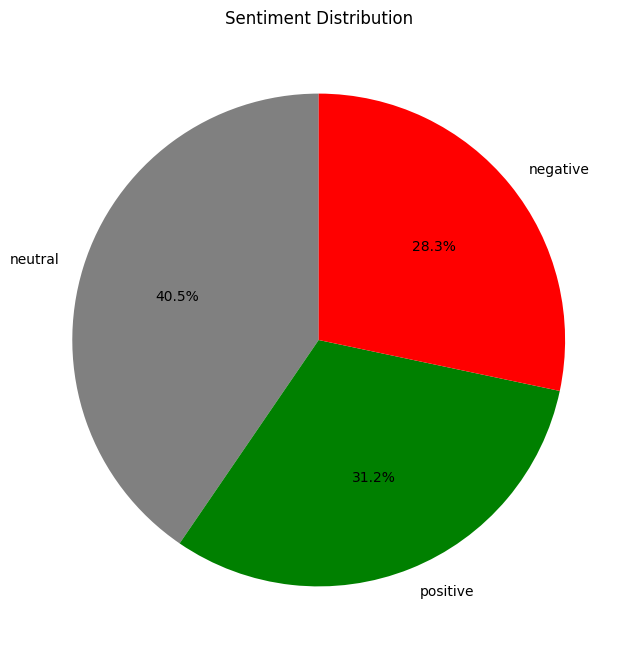

In [ ]:
value_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(
    value_counts.values,
    labels= value_counts.index,
    colors=['grey','green','red'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
min_class_size = df['sentiment'].value_counts().min()
neutral_sample = df[df['sentiment'] == 'neutral'].sample(min_class_size, random_state=42)
negative_sample = df[df['sentiment'] == 'negative']
positive_sample = df[df['sentiment'] == 'positive'].sample(min_class_size, random_state=42)
undersampled_df = pd.concat([neutral_sample, positive_sample, negative_sample])
print(undersampled_df['sentiment'].value_counts())

sentiment
neutral     7781
positive    7781
negative    7781
Name: count, dtype: int64


In [ ]:
df = undersampled_df

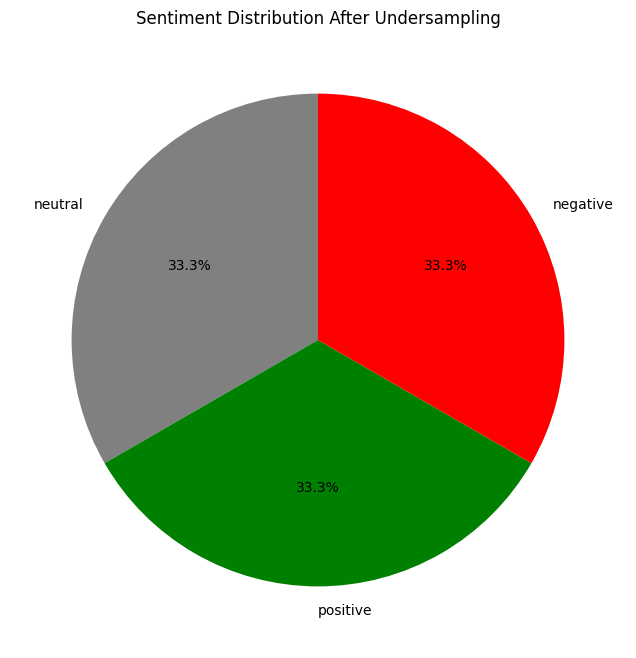

In [ ]:
value_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(
    value_counts.values,
    labels=value_counts.index,
    colors=['grey', 'green', 'red'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Sentiment Distribution After Undersampling')
plt.show()

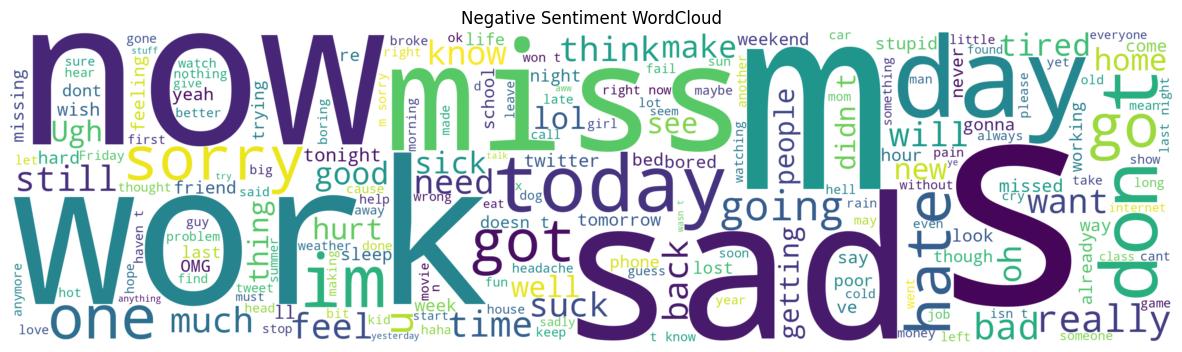

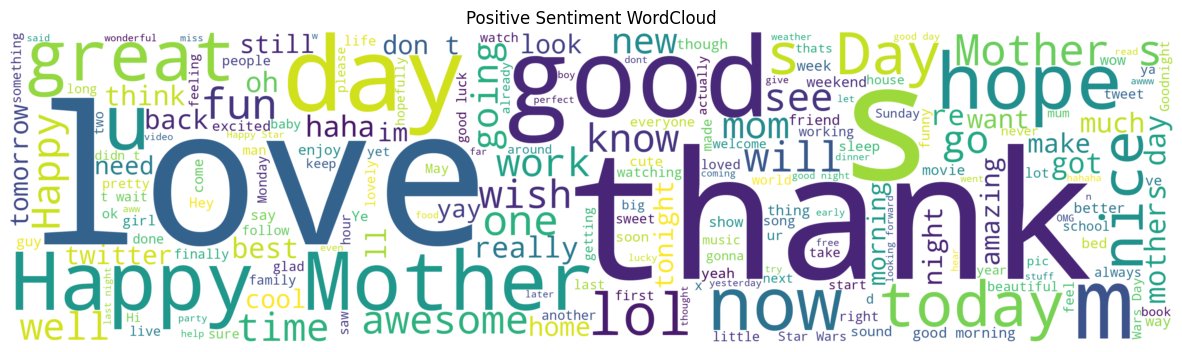

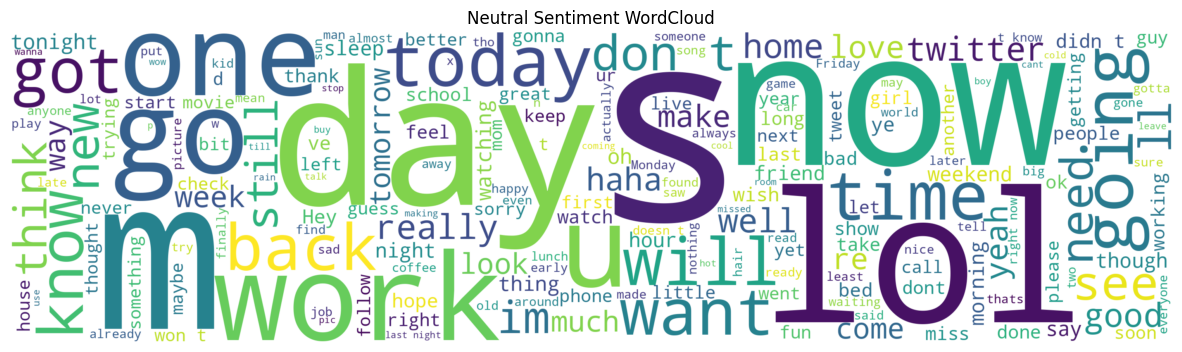

In [ ]:
from wordcloud import WordCloud, STOPWORDS
negative_df = df[df['sentiment'] == 'negative']
positive_df = df[df['sentiment'] == 'positive']
neutral_df = df[df['sentiment'] == 'neutral']

def generate_wordcloud(data, title):
  words = ' '.join(data['text'])
  cleaned_word = " ".join([
      word for word in words.split()
      if 'http' not in word
      and not word.startswith('@')
      and word != 'RT'
  ])
  wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',
                        width= 3000, height= 800).generate(cleaned_word)
  plt.figure(figsize=(15, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(title)
  plt.axis('off')
  plt.show()

generate_wordcloud(negative_df, 'Negative Sentiment WordCloud')
generate_wordcloud(positive_df, 'Positive Sentiment WordCloud')
generate_wordcloud(neutral_df, 'Neutral Sentiment WordCloud')

In [ ]:
X = df['text_without_stopwords']
y = df['sentiment']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X).toarray()
vectorizer

CountVectorizer()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
results_df = pd.DataFrame(np.zeros((4,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
results_df.index = ['Logistic Regression (LR)','Naïve Bayes Classifier (NB)', 'Decision Tree Classifier (DT)', 'Random Forest Classifier (RF)' ]
results_df

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0


In [ ]:
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

In [ ]:
def Classification_Summary(pred, pred_prob, i):
  results_df.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100
  results_df.iloc[i]['Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100
  results_df.iloc[i]['Recall']=round(recall_score(y_test, pred, average='weighted'),3)*100
  results_df.iloc[i]['F1-score']=round(f1_score(y_test, pred, average = 'weighted'),3)*100
  results_df.iloc[i]['AUC-ROC score']=round(roc_auc_score(y_test, pred_prob, multi_class='ovr'),3)*100
  print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,results_df.index[i], '-'*35,'>'*3))
  print('Accuracy={}%'.format(round(accuracy_score(y_test, pred),3)*100))
  print('F1-score={}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100))
  print('\n\033[1mConfusion Matrix:\033[0m\n', confusion_matrix(y_test, pred))
  print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))
  auc_roc(y_test, pred_prob, curves=['each_class'])
  plt.show()

In [ ]:
LR_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR = LR_model.fit(X_train, y_train)

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy=68.8%
F1-score=68.89999999999999%

Confusion Matrix:
 [[1019  385  113]
 [ 334 1005  237]
 [  90  299 1187]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.67      0.69      1517
     neutral       0.60      0.64      0.62      1576
    positive       0.77      0.75      0.76      1576

    accuracy                           0.69      4669
   macro avg       0.69      0.69      0.69      4669
weighted avg       0.69      0.69      0.69      4669



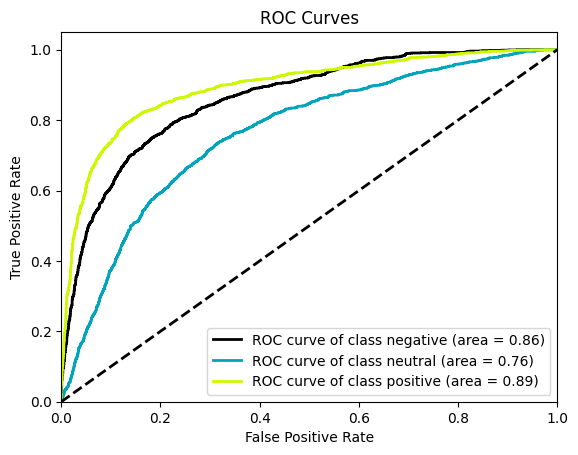

In [ ]:
pred = LR.predict(X_test)
pred_prob = LR.predict_proba(X_test)
Classification_Summary(pred, pred_prob, 0)

In [ ]:
results_df

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),68.8,69.1,68.8,68.9,83.9
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0


In [ ]:
NB_model = BernoulliNB()
NB = NB_model.fit(X_train, y_train)

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy=66.0%
F1-score=66.0%

Confusion Matrix:
 [[1020  388  109]
 [ 366  913  297]
 [ 126  303 1147]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.67      0.67      1517
     neutral       0.57      0.58      0.57      1576
    positive       0.74      0.73      0.73      1576

    accuracy                           0.66      4669
   macro avg       0.66      0.66      0.66      4669
weighted avg       0.66      0.66      0.66      4669



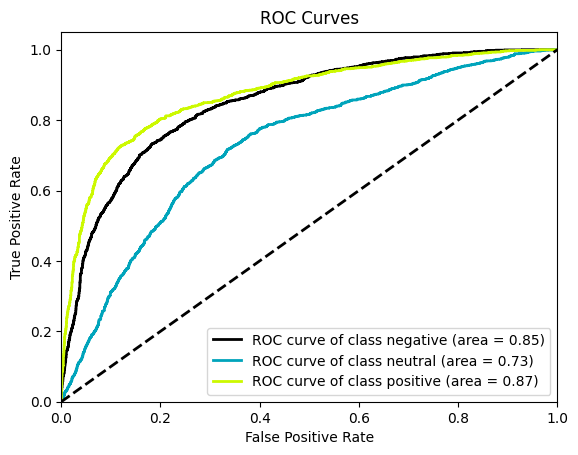

In [ ]:
pred = NB.predict(X_test)
pred_prob = NB.predict_proba(X_test)
Classification_Summary(pred, pred_prob, 1)

In [ ]:
results_df

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),68.8,69.1,68.8,68.9,83.9
Naïve Bayes Classifier (NB),66.0,66.1,66.0,66.0,81.7
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0


In [ ]:
DT_model = DecisionTreeClassifier(random_state=42)
DT = DT_model.fit(X_train, y_train)

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy=66.10000000000001%
F1-score=66.10000000000001%

Confusion Matrix:
 [[ 993  388  136]
 [ 348  949  279]
 [ 154  278 1144]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.66      0.65      0.66      1517
     neutral       0.59      0.60      0.59      1576
    positive       0.73      0.73      0.73      1576

    accuracy                           0.66      4669
   macro avg       0.66      0.66      0.66      4669
weighted avg       0.66      0.66      0.66      4669



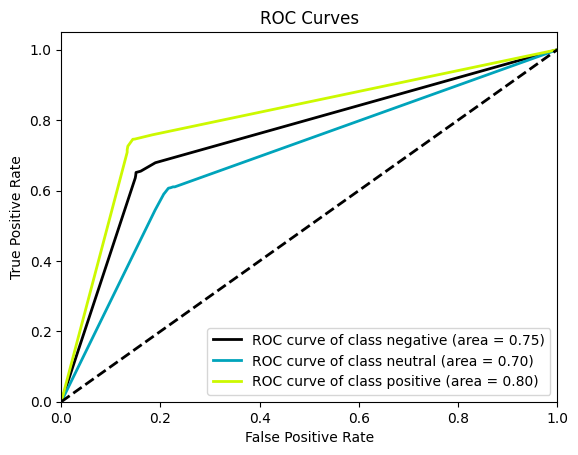

In [ ]:
pred = DT.predict(X_test)
pred_prob = DT.predict_proba(X_test)
Classification_Summary(pred, pred_prob, 2)

In [ ]:
results_df

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),68.8,69.1,68.8,68.9,83.9
Naïve Bayes Classifier (NB),66.0,66.1,66.0,66.0,81.7
Decision Tree Classifier (DT),66.1,66.2,66.1,66.1,75.1
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0


In [ ]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF = RF_model.fit(X_train, y_train)

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy=70.3%
F1-score=70.3%

Confusion Matrix:
 [[ 988  412  117]
 [ 247 1079  250]
 [  90  273 1213]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.65      0.70      1517
     neutral       0.61      0.68      0.65      1576
    positive       0.77      0.77      0.77      1576

    accuracy                           0.70      4669
   macro avg       0.71      0.70      0.70      4669
weighted avg       0.71      0.70      0.70      4669



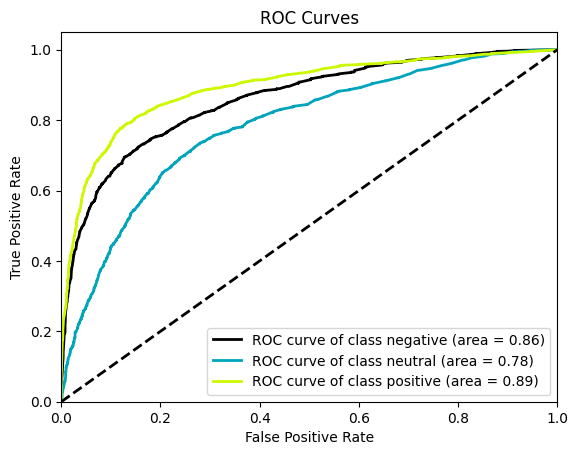

In [ ]:
pred = RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)
Classification_Summary(pred, pred_prob, 3)

In [ ]:
results_df

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),68.8,69.1,68.8,68.9,83.9
Naïve Bayes Classifier (NB),66.0,66.1,66.0,66.0,81.7
Decision Tree Classifier (DT),66.1,66.2,66.1,66.1,75.1
Random Forest Classifier (RF),70.3,70.8,70.3,70.3,84.5


In [ ]:
def predict_sentiment(text, cvectorizer, model):
  text_vectorized = cvectorizer.transform([text])
  prediction = model.predict(text_vectorized)
  prediction_proba = model.predict_proba(text_vectorized)
  sentiment = prediction[0]
  probabilities = {f"{model.classes_[i]}": prob for i, prob in enumerate(prediction_proba[0])}
  return sentiment, probabilities

In [ ]:
random_text = "I love this product, it is amazing!"
sentiment, probabilities = predict_sentiment(random_text, vectorizer, LR_model)

print("Tahmin edilen duygu:", sentiment)
print("Olasılık dağılımı:", probabilities)

Tahmin edilen duygu: positive
Olasılık dağılımı: {'negative': 0.0012024745084395552, 'neutral': 0.01344954756778914, 'positive': 0.9853479779237713}


In [ ]:
random_text2 = "This product is terrible, I hate it"
sentiment, probabilities = predict_sentiment(random_text2, vectorizer, LR_model)

print("Tahmin edilen duygu:", sentiment)
print("Olasılık dağılımı:", probabilities)

Tahmin edilen duygu: negative
Olasılık dağılımı: {'negative': 0.9942663183853722, 'neutral': 0.005599722430010646, 'positive': 0.00013395918461718665}


In [ ]:
random_text3 = "Today I have some work to do, but I will finish it soon."
sentiment, probabilities = predict_sentiment(random_text3, vectorizer, LR_model)

print("Tahmin edilen duygu:", sentiment)
print("Olasılık dağılımı:", probabilities)

Tahmin edilen duygu: neutral
Olasılık dağılımı: {'negative': 0.10727817400410691, 'neutral': 0.7525488810069912, 'positive': 0.14017294498890187}


In [ ]:
random_text = "I love this product, it is amazing!"
sentiment, probabilities = predict_sentiment(random_text, vectorizer, RF_model)

print("Tahmin edilen duygu:", sentiment)
print("Olasılık dağılımı:", probabilities)

Tahmin edilen duygu: positive
Olasılık dağılımı: {'negative': 0.1, 'neutral': 0.04, 'positive': 0.86}


In [ ]:
random_text2 = "This product is terrible, I hate it"
sentiment, probabilities = predict_sentiment(random_text2, vectorizer, RF_model)

print("Tahmin edilen duygu:", sentiment)
print("Olasılık dağılımı:", probabilities)

Tahmin edilen duygu: negative
Olasılık dağılımı: {'negative': 0.82, 'neutral': 0.12, 'positive': 0.06}


In [ ]:
random_text3 = "Today I have some work to do, but I will finish it soon."
sentiment, probabilities = predict_sentiment(random_text3, vectorizer, RF_model)

print("Tahmin edilen duygu:", sentiment)
print("Olasılık dağılımı:", probabilities)

Tahmin edilen duygu: neutral
Olasılık dağılımı: {'negative': 0.25, 'neutral': 0.51, 'positive': 0.24}
